# Imports

In [1]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 67.5 MB/s eta 0:00:00


In [2]:
import io
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt
from google.colab import files
import contextily as ctx
import zipfile
import seaborn as sns
from matplotlib import animation
import plotly.graph_objects as go

# Uploading files

In [3]:
# read file from windows


uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving cities_coordinates.csv to cities_coordinates.csv
Saving alarms.csv to alarms.csv
User uploaded file "cities_coordinates.csv" with length 140253 bytes
User uploaded file "alarms.csv" with length 3396654 bytes


# Reading files

## Reading alarms_df

In [4]:
# read alarms.csv into alarms_df

# alarms_df = pd.read_csv(io.BytesIO(uploaded['alarms.csv']))
alarms_df = pd.read_csv(r'/content/alarms.csv')
alarms_df.head()

time      cities  threat    id       description origin
0  2019-06-13 00:17:00       נירים       0  5665  ירי רקטות וטילים   Gaza
1  2019-06-13 20:56:00       שדרות       0  5671  ירי רקטות וטילים   Gaza
2  2019-06-13 20:56:00       איבים       0  5671  ירי רקטות וטילים   Gaza
3  2019-06-18 10:06:00  אשדוד - יא       0  5672  ירי רקטות וטילים   Gaza
4  2019-06-18 10:06:00       מרינה       0  5672  ירי רקטות וטילים   Gaza

In [5]:
alarms_df.dtypes

time           object
cities         object
threat          int64
id              int64
description    object
origin         object
dtype: object

In [6]:
# change the type of the column time in alarms_df into a date time object

alarms_df['time'] = pd.to_datetime(alarms_df['time'])
alarms_df.dtypes

time           datetime64[ns]
cities                 object
threat                  int64
id                      int64
description            object
origin                 object
dtype: object

In [7]:
# strip white spaces in alarms_df's cities column

alarms_df['cities'] = alarms_df['cities'].str.strip()


## Reading cities_coordinates

In [8]:
# cities_coordinates.csv into cities_df

# cities_df = pd.read_csv(io.BytesIO(uploaded['cities_coordinates.csv']),  encoding = "utf_8")
cities_df = pd.read_csv(r'/content/cities_coordinates.csv')
cities_df.head()

X             Y  OBJECTID_1  OBJECTID  SETL_CODE MGLSDE_LOC  \
0  3.878046e+06  3.744646e+06           1         1        862  גני יוחנן   
1  3.886584e+06  3.758491e+06           2         2        863     גינתון   
2  3.887844e+06  3.740920e+06           3         3        864       בקוע   
3  3.852503e+06  3.684334e+06           4         4        865    שיבולים   
4  3.903204e+06  3.490060e+06           5         5        866      יטבתה   

   MGLSDE_L_1  MGLSDE_L_2                   MGLSDE_L_3     MGLSDE_L_4  
0         536          31  מושבים (כפרים שיתופיים) (ב)  GANNE YOHANAN  
1         582          31  מושבים (כפרים שיתופיים) (ב)       GINNATON  
2         497          31  מושבים (כפרים שיתופיים) (ב)          BEQOA  
3         297          31  מושבים (כפרים שיתופיים) (ב)      SHIBBOLIM  
4         576          33                      קיבוצים        YOTVATA

In [9]:
# strip white spaces in MGLSDE_LOC column in cities_df

cities_df['MGLSDE_LOC'] = cities_df['MGLSDE_LOC'].str.strip()


In [10]:
cities_df[cities_df['MGLSDE_LOC']=="שחר"]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE MGLSDE_LOC  \
459  3.865673e+06  3.713641e+06         460       460          7        שחר   

     MGLSDE_L_1  MGLSDE_L_2                   MGLSDE_L_3 MGLSDE_L_4  
459         458          31  מושבים (כפרים שיתופיים) (ב)     SHAHAR

# Fixing files

## Dealing with '-'

### checking cities_df

In [11]:
cities_df[cities_df['MGLSDE_LOC'].str.contains("תל אביב")]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
983  3.871394e+06  3.773700e+06         984       984       5000   

       MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2     MGLSDE_L_3       MGLSDE_L_4  
983  תל אביב -יפו      360500          12  תל אביב - יפו  TEL AVIV - YAFO

In [12]:
cities_df.loc[cities_df['MGLSDE_LOC'].str.contains("-")]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
20    3.940552e+06  3.853726e+06          21        21        913   
30    3.917481e+06  3.861797e+06          31        31        978   
34    3.920995e+06  3.866595e+06          35        35        998   
55    3.927588e+06  3.897671e+06          56        56       1063   
60    3.925075e+06  3.832811e+06          61        61       1069   
74    3.925792e+06  3.887008e+06          75        75        490   
84    3.923829e+06  3.872838e+06          85        85        505   
111   3.886332e+06  3.833973e+06         112       112        541   
114   3.940644e+06  3.887388e+06         115       115        546   
270   3.909190e+06  3.827873e+06         271       271        657   
381   3.956948e+06  3.857814e+06         382       382       1104   
382   3.956027e+06  3.861279e+06         383       383       1105   
387   3.888953e+06  3.721030e+06         388       388       1114   
395   3.961868e+06  3.890651e+06         396       396        962   
441   3.916086e+06  3.885590e+06         442       442       1181   
455   3.898661e+06  3.652942e+06         456       456       1192   
586   3.886280e+06  3.800052e+06         587       587        195   
598   3.943464e+06  3.831690e+06         599       599         90   
679   3.884030e+06  3.807221e+06         680       680        326   
743   3.865061e+06  3.733438e+06         744       744        406   
808   3.937294e+06  3.869886e+06         809       809        482   
812   3.912963e+06  3.832042e+06         813       813       2710   
882   3.918649e+06  3.807634e+06         883       883       3711   
947   3.977007e+06  3.869000e+06         948       948       4002   
948   3.982073e+06  3.919076e+06         949       949       4003   
968   3.967355e+06  3.886182e+06         969       969       4026   
983   3.871394e+06  3.773700e+06         984       984       5000   
987   3.900440e+06  3.818039e+06         988       988       6000   
1008  3.892180e+06  3.825563e+06        1009      1009       7800   
1082  3.897724e+06  3.750013e+06        1083      1083       1200   
1122  3.904173e+06  3.825368e+06        1123      1123       1247   
1147  3.878269e+06  3.658443e+06        1148      1148       1286   
1153  3.923238e+06  3.892668e+06        1154      1154       1295   
1154  3.930015e+06  3.891281e+06        1155      1155       1296   
1163  3.910092e+06  3.828821e+06        1164      1164       1316   
1170  3.937643e+06  3.883869e+06        1171      1171       1334   
1172  3.874355e+06  3.726724e+06        1173      1173       1339   
1186  3.902450e+06  3.825113e+06        1187      1187       2024   
1196  3.911684e+06  3.885684e+06        1197      1197       1292   

               MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2  \
20      שבלי - אום אל-גנם        4400          28   
30    כעביה-טבאש-חג'אג'רה        3540          28   
34           ביר אל-מכסור        6440          28   
55           מעלות-תרשיחא       20650          16   
60                 רם-און         526          31   
74             דיר אל-אסד        8290          28   
84     כאוכב אבו אל-היג'א        2580          28   
111           ג'סר א-זרקא       10200          27   
114            עין אל-אסד         751          45   
270            עין א-סהלה         981          45   
381    פורייה - כפר עבודה         288          35   
382    פורייה - נווה עובד         888          35   
387       שריגים (לי-און)         896          35   
395          טובא-זנגרייה        4790          28   
441                 טל-אל         844          37   
455            ערערה-בנגב       10500          27   
586            צורן-קדימה        9130          18   
598               חפצי-בה         400          33   
679      בית יצחק-שער חפר        1560          31   
743            חצור-אשדוד         560          33   
808      בועיינה-נוג'ידאת        7090          28   
812            אום אל-פחם       38000          26   
882                שא-נור          43

In [13]:
cities_df.loc[cities_df['MGLSDE_LOC'].str.contains(" - ")]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
20   3.940552e+06  3.853726e+06          21        21        913   
381  3.956948e+06  3.857814e+06         382       382       1104   
382  3.956027e+06  3.861279e+06         383       383       1105   

             MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2  \
20    שבלי - אום אל-גנם        4400          28   
381  פורייה - כפר עבודה         288          35   
382  פורייה - נווה עובד         888          35   

                            MGLSDE_L_3            MGLSDE_L_4  
20   2000-9999 תושבים,ישובים לא יהודים  SHIBLI-UMM AL-GHANAM  
381         ישובים כפריים יהודים אחרים   PORIYYA-KEFAR AVODA  
382         ישובים כפריים יהודים אחרים     PORIYYA-NEWE OVED

In [14]:
cities_df.loc[cities_df['MGLSDE_LOC'].str.contains(" -")]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
20    3.940552e+06  3.853726e+06          21        21        913   
381   3.956948e+06  3.857814e+06         382       382       1104   
382   3.956027e+06  3.861279e+06         383       383       1105   
948   3.982073e+06  3.919076e+06         949       949       4003   
983   3.871394e+06  3.773700e+06         984       984       5000   
1163  3.910092e+06  3.828821e+06        1164      1164       1316   
1172  3.874355e+06  3.726724e+06        1173      1173       1339   

              MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2  \
20     שבלי - אום אל-גנם        4400          28   
381   פורייה - כפר עבודה         288          35   
382   פורייה - נווה עובד         888          35   
948              אל -רום         285          33   
983         תל אביב -יפו      360500          12   
1163           אל -עריאן         263          45   
1172             אל -עזי          79          45   

                             MGLSDE_L_3            MGLSDE_L_4  
20    2000-9999 תושבים,ישובים לא יהודים  SHIBLI-UMM AL-GHANAM  
381          ישובים כפריים יהודים אחרים   PORIYYA-KEFAR AVODA  
382          ישובים כפריים יהודים אחרים     PORIYYA-NEWE OVED  
948                             קיבוצים                EL-ROM  
983                       תל אביב - יפו       TEL AVIV - YAFO  
1163      ישובים כפריים אחרים לא יהודים              AL-ARYAN  
1172      ישובים כפריים אחרים לא יהודים                AL-AZY

In [15]:
cities_df.loc[cities_df['MGLSDE_LOC'].str.contains("- ")]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
20   3.940552e+06  3.853726e+06          21        21        913   
381  3.956948e+06  3.857814e+06         382       382       1104   
382  3.956027e+06  3.861279e+06         383       383       1105   

             MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2  \
20    שבלי - אום אל-גנם        4400          28   
381  פורייה - כפר עבודה         288          35   
382  פורייה - נווה עובד         888          35   

                            MGLSDE_L_3            MGLSDE_L_4  
20   2000-9999 תושבים,ישובים לא יהודים  SHIBLI-UMM AL-GHANAM  
381         ישובים כפריים יהודים אחרים   PORIYYA-KEFAR AVODA  
382         ישובים כפריים יהודים אחרים     PORIYYA-NEWE OVED

### checking alarms_df

In [16]:
alarms_df.loc[alarms_df['cities'].str.contains("-")]

time                       cities  threat    id  \
3     2019-06-18 10:06:00                   אשדוד - יא       0  5672   
35    2019-07-31 10:07:00                  ג'סר א-זרקא       0  5687   
36    2019-07-31 10:07:00                  עין אל-סהלה       0  5725   
97    2019-07-31 10:12:00                  חדרה - מזרח       0  5764   
98    2019-07-31 10:17:00                  חדרה - מרכז       0  5765   
...                   ...                          ...     ...   ...   
41936 2024-10-13 14:02:53                   דיר אל-אסד       0  4241   
42013 2024-10-13 18:50:44            עכו - אזור תעשייה       5  4252   
42063 2024-10-13 23:03:57                  חיפה - כרמל       0  4260   
42064 2024-10-13 23:03:57                  חיפה - מערב       0  4260   
42066 2024-10-13 23:04:26  חיפה - נווה שאנן ורמות כרמל       0  4260   

              description   origin  
3        ירי רקטות וטילים     Gaza  
35       ירי רקטות וטילים     Gaza  
36       ירי רקטות וטילים     Gaza  
97       ירי רקטות וטילים     Gaza  
98       ירי רקטות וטילים     Gaza  
...                   ...      ...  
41936    ירי רקטות וטילים  Lebanon  
42013  חדירת כלי טיס עוין  Lebanon  
42063    ירי רקטות וטילים  Lebanon  
42064    ירי רקטות וטילים  Lebanon  
42066    ירי רקטות וטילים  Lebanon  

[3287 rows x 6 columns]

In [17]:
alarms_df.loc[alarms_df['cities'].str.contains(" - ")]

time                       cities  threat    id  \
3     2019-06-18 10:06:00                   אשדוד - יא       0  5672   
97    2019-07-31 10:12:00                  חדרה - מזרח       0  5764   
98    2019-07-31 10:17:00                  חדרה - מרכז       0  5765   
99    2019-07-31 10:22:00             חדרה - נווה חיים       0  5766   
100   2019-07-31 10:27:00                  חדרה - מערב       0  5767   
...                   ...                          ...     ...   ...   
41911 2024-10-13 14:01:55                  עצמון - שגב       0  4241   
42013 2024-10-13 18:50:44            עכו - אזור תעשייה       5  4252   
42063 2024-10-13 23:03:57                  חיפה - כרמל       0  4260   
42064 2024-10-13 23:03:57                  חיפה - מערב       0  4260   
42066 2024-10-13 23:04:26  חיפה - נווה שאנן ורמות כרמל       0  4260   

              description   origin  
3        ירי רקטות וטילים     Gaza  
97       ירי רקטות וטילים     Gaza  
98       ירי רקטות וטילים     Gaza  
99       ירי רקטות וטילים     Gaza  
100      ירי רקטות וטילים     Gaza  
...                   ...      ...  
41911    ירי רקטות וטילים  Lebanon  
42013  חדירת כלי טיס עוין  Lebanon  
42063    ירי רקטות וטילים  Lebanon  
42064    ירי רקטות וטילים  Lebanon  
42066    ירי רקטות וטילים  Lebanon  

[2904 rows x 6 columns]

In [18]:
cities_hyphen = cities_df.loc[cities_df['MGLSDE_LOC'].str.contains(" - "), 'MGLSDE_LOC'].to_list()
cities_hyphen

['שבלי - אום אל-גנם', 'פורייה - כפר עבודה', 'פורייה - נווה עובד']

In [19]:
[alarms_df['cities'].str.contains(x).any() for x in cities_hyphen]

[False, False, False]

In [20]:
[alarms_df['cities'].str.contains(x).any() for x in ["שבלי","תל","פוריה"]]

[True, True, True]

In [21]:
alarms_df.loc[(alarms_df['cities'].str.contains("שבלי")) | (alarms_df['cities'].str.contains(" תל")) | (alarms_df['cities'].str.contains("פוריה"))]

time            cities  threat    id       description  \
11334 2023-10-07 06:34:21          אבו תלול       0   446  ירי רקטות וטילים   
11533 2023-10-07 06:39:54          אבו תלול       0   446  ירי רקטות וטילים   
11574 2023-10-07 06:42:19          אבו תלול       0   446  ירי רקטות וטילים   
11686 2023-10-07 06:45:41          אבו תלול       0   446  ירי רקטות וטילים   
11726 2023-10-07 06:48:06          אבו תלול       0   446  ירי רקטות וטילים   
...                   ...               ...     ...   ...               ...   
38947 2024-10-01 19:52:26   פוריה נווה עובד       0  3911  ירי רקטות וטילים   
39006 2024-10-01 19:52:26       פוריה עילית       0  3911  ירי רקטות וטילים   
39115 2024-10-01 19:56:39          אבו תלול       0  3912  ירי רקטות וטילים   
40040 2024-10-05 13:26:44  בית עלמין תל רגב       0  4035  ירי רקטות וטילים   
41525 2024-10-11 17:22:03  בית עלמין תל רגב       0  4188  ירי רקטות וטילים   

        origin  
11334     Gaza  
11533     Gaza  
11574     Gaza  
11686     Gaza  
11726     Gaza  
...        ...  
38947     Iran  
39006     Iran  
39115     Iran  
40040  Lebanon  
41525  Lebanon  

[87 rows x 6 columns]

In [22]:
alarms_df.loc[(alarms_df['cities'].str.contains("שבלי"))]

time cities  threat    id         description   origin
17039 2023-10-11 18:35:35   שבלי       5   782  חדירת כלי טיס עוין       FA
35069 2024-09-29 14:26:09   שבלי       0  3856    ירי רקטות וטילים  Lebanon
38920 2024-10-01 19:52:26   שבלי       0  3911    ירי רקטות וטילים     Iran

In [23]:
alarms_df.loc[(alarms_df['cities'].str.contains("פוריה"))]

time           cities  threat    id         description  \
16796 2023-10-11 18:24:03      פוריה עילית       5   779  חדירת כלי טיס עוין   
16798 2023-10-11 18:24:03  פוריה נווה עובד       5   779  חדירת כלי טיס עוין   
16799 2023-10-11 18:24:03  פוריה כפר עבודה       5   779  חדירת כלי טיס עוין   
16941 2023-10-11 18:35:25  פוריה כפר עבודה       5   782  חדירת כלי טיס עוין   
16959 2023-10-11 18:35:25  פוריה נווה עובד       5   782  חדירת כלי טיס עוין   
16966 2023-10-11 18:35:25      פוריה עילית       5   782  חדירת כלי טיס עוין   
17030 2023-10-11 18:35:35          בלפוריה       5   782  חדירת כלי טיס עוין   
21689 2023-12-02 17:27:51          בלפוריה       0  1676    ירי רקטות וטילים   
28596 2024-06-12 09:00:49  פוריה נווה עובד       0  2915    ירי רקטות וטילים   
32528 2024-09-22 01:10:44          בלפוריה       0  3719    ירי רקטות וטילים   
33290 2024-09-24 02:40:12          בלפוריה       0  3766    ירי רקטות וטילים   
33302 2024-09-24 02:56:37          בלפוריה       0  3767    ירי רקטות וטילים   
33333 2024-09-24 03:11:27          בלפוריה       0  3768    ירי רקטות וטילים   
33380 2024-09-24 09:36:17          בלפוריה       0  3771    ירי רקטות וטילים   
34055 2024-09-27 09:30:10      פוריה עילית       0  3823    ירי רקטות וטילים   
34056 2024-09-27 09:30:10  פוריה נווה עובד       0  3823    ירי רקטות וטילים   
34058 2024-09-27 09:30:10  פוריה כפר עבודה       0  3823    ירי רקטות וטילים   
34378 2024-09-28 08:04:01          בלפוריה       0  3833    ירי רקטות וטילים   
35037 2024-09-29 08:39:00      פוריה עילית       0  3853    ירי רקטות וטילים   
35039 2024-09-29 08:39:00  פוריה נווה עובד       0  3853    ירי רקטות וטילים   
35044 2024-09-29 08:39:00  פוריה כפר עבודה       0  3853    ירי רקטות וטילים   
35088 2024-09-29 14:26:14          בלפוריה       0  3856    ירי רקטות וטילים   
38836 2024-10-01 19:51:44          בלפוריה       0  3911    ירי רקטות וטילים   
38935 2024-10-01 19:52:26  פוריה כפר עבודה       0  3911    ירי רקטות וטילים   
38947 2024-10-01 19:52:26  פוריה נווה עובד       0  3911    ירי רקטות וטילים   
39006 2024-10-01 19:52:26      פוריה עילית       0  3911    ירי רקטות וטילים   

        origin  
16796       FA  
16798       FA  
16799       FA  
16941       FA  
16959       FA  
16966       FA  
17030       FA  
21689   Israel  
28596  Lebanon  
32528  Lebanon  
33290  Lebanon  
33302  Lebanon  
33333  Lebanon  
33380  Lebanon  
34055  Lebanon  
34056  Lebanon  
34058  Lebanon  
34378  Lebanon  
35037  Lebanon  
35039  Lebanon  
35044  Lebanon  
35088  Lebanon  
38836     Iran  
38935     Iran  
38947     Iran  
39006     Iran

In [24]:
alarms_df.loc[(alarms_df['cities'].str.contains("אום אל"))]

time        cities  threat     id         description  \
22    2019-07-31 10:07:00    אום אל פחם       0   5711    ירי רקטות וטילים   
68    2019-07-31 10:07:00  אום אל קוטוף       0   5712    ירי רקטות וטילים   
8964  2022-02-09 01:07:00    אום אל פחם       0  14338    ירי רקטות וטילים   
17076 2023-10-11 18:35:35    אום אל-גנם       5    782  חדירת כלי טיס עוין   
33186 2024-09-23 18:56:39    אום אל פחם       0   3763    ירי רקטות וטילים   
34306 2024-09-28 08:02:16    אום אל פחם       0   3833    ירי רקטות וטילים   
34426 2024-09-28 08:05:24    אום אל פחם       0   3833    ירי רקטות וטילים   
34427 2024-09-28 08:05:24  אום אל קוטוף       0   3833    ירי רקטות וטילים   
35074 2024-09-29 14:26:09    אום אלג'נם       0   3856    ירי רקטות וטילים   
37183 2024-10-01 19:39:59  אום אל קוטוף       0   3910    ירי רקטות וטילים   
37219 2024-10-01 19:40:05    אום אל פחם       0   3910    ירי רקטות וטילים   
38039 2024-10-01 19:50:18  אום אל קוטוף       0   3911    ירי רקטות וטילים   
38065 2024-10-01 19:50:18    אום אל פחם       0   3911    ירי רקטות וטילים   
39033 2024-10-01 19:52:26    אום אלג'נם       0   3911    ירי רקטות וטילים   

        origin  
22        Gaza  
68        Gaza  
8964      Gaza  
17076       FA  
33186  Lebanon  
34306  Lebanon  
34426  Lebanon  
34427  Lebanon  
35074  Lebanon  
37183     Iran  
37219     Iran  
38039     Iran  
38065     Iran  
39033     Iran

In [25]:
alarms_df.loc[(alarms_df['cities'].str.contains("יפו"))]

time                    cities  threat    id  \
348   2019-11-12 08:00:00  תל אביב - דרום העיר ויפו       0  5976   
2323  2021-05-11 20:46:00  תל אביב - דרום העיר ויפו       0  7899   
2459  2021-05-11 20:48:00  תל אביב - דרום העיר ויפו       0  8052   
2645  2021-05-11 20:51:00  תל אביב - דרום העיר ויפו       0  8147   
2784  2021-05-11 20:59:00  תל אביב - דרום העיר ויפו       0  8326   
...                   ...                       ...     ...   ...   
38948 2024-10-01 19:52:26                    ציפורי       0  3911   
38994 2024-10-01 19:52:26       אזור תעשייה ציפורית       0  3911   
40415 2024-10-07 11:01:08  תל אביב - דרום העיר ויפו       0  4079   
41438 2024-10-11 16:31:02       אזור תעשייה ציפורית       0  4181   
41441 2024-10-11 16:31:02                    ציפורי       0  4181   

            description   origin  
348    ירי רקטות וטילים     Gaza  
2323   ירי רקטות וטילים     Gaza  
2459   ירי רקטות וטילים     Gaza  
2645   ירי רקטות וטילים     Gaza  
2784   ירי רקטות וטילים     Gaza  
...                 ...      ...  
38948  ירי רקטות וטילים     Iran  
38994  ירי רקטות וטילים     Iran  
40415  ירי רקטות וטילים     Gaza  
41438  ירי רקטות וטילים  Lebanon  
41441  ירי רקטות וטילים  Lebanon  

[105 rows x 6 columns]

### making changes

In [26]:
cities_hyphen

['שבלי - אום אל-גנם', 'פורייה - כפר עבודה', 'פורייה - נווה עובד']

In [27]:
cities_df.loc[cities_df['MGLSDE_LOC'].str.contains("אום אל")]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
20    3.940552e+06  3.853726e+06          21        21        913   
812   3.912963e+06  3.832042e+06         813       813       2710   
1186  3.902450e+06  3.825113e+06        1187      1187       2024   

             MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2  \
20    שבלי - אום אל-גנם        4400          28   
812          אום אל-פחם       38000          26   
1186       אום אל-קוטוף         744          45   

                               MGLSDE_L_3            MGLSDE_L_4  
20      2000-9999 תושבים,ישובים לא יהודים  SHIBLI-UMM AL-GHANAM  
812   20000-49999 תושבים,ישובים לא יהודים           UMM AL-FAHM  
1186        ישובים כפריים אחרים לא יהודים          UMM AL-QUTUF

In [28]:
cities_df.loc[cities_df['MGLSDE_LOC'].str.contains("שבלי - אום אל-גנם"), 'MGLSDE_LOC'] = "שבלי"
cities_df.loc[cities_df['MGLSDE_LOC']=="שבלי"]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE MGLSDE_LOC  \
20  3.940552e+06  3.853726e+06          21        21        913       שבלי   

    MGLSDE_L_1  MGLSDE_L_2                         MGLSDE_L_3  \
20        4400          28  2000-9999 תושבים,ישובים לא יהודים   

              MGLSDE_L_4  
20  SHIBLI-UMM AL-GHANAM

In [29]:
alarms_df.loc[alarms_df['cities'].str.contains("אום אל"), 'cities'].unique()

array(['אום אל פחם', 'אום אל קוטוף', 'אום אל-גנם', "אום אלג'נם"],
      dtype=object)

In [30]:
alarms_df.loc[alarms_df['cities']=='אום אל-גנם', 'cities'] = "שבלי"
alarms_df.loc[alarms_df['cities']=="אום אלג'נם",'cities'] = "שבלי"

In [31]:
cities_df.loc[cities_df['MGLSDE_LOC'].str.contains("פורייה - כפר עבודה"), 'MGLSDE_LOC'] = "פוריה כפר עבודה"
cities_df.loc[cities_df['MGLSDE_LOC']=="פוריה כפר עבודה"]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
381  3.956948e+06  3.857814e+06         382       382       1104   

          MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2                  MGLSDE_L_3  \
381  פוריה כפר עבודה         288          35  ישובים כפריים יהודים אחרים   

              MGLSDE_L_4  
381  PORIYYA-KEFAR AVODA

In [32]:
cities_df.loc[cities_df['MGLSDE_LOC'].str.contains("פורייה - נווה עובד"), 'MGLSDE_LOC'] = "פוריה נווה עובד"
cities_df.loc[cities_df['MGLSDE_LOC']=="פוריה נווה עובד"]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
382  3.956027e+06  3.861279e+06         383       383       1105   

          MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2                  MGLSDE_L_3  \
382  פוריה נווה עובד         888          35  ישובים כפריים יהודים אחרים   

            MGLSDE_L_4  
382  PORIYYA-NEWE OVED

In [33]:
# switch every '-' in cities_df['MGLSDE_LOC'] into space

cities_df['MGLSDE_LOC'] = cities_df['MGLSDE_LOC'].str.replace('-', ' ')
cities_df['MGLSDE_LOC']

0        גני יוחנן
1           גינתון
2             בקוע
3          שיבולים
4            יטבתה
           ...    
1235       בית שמש
1236    קריית אונו
1237      קריית גת
1238      ראש העין
1239     רמת השרון
Name: MGLSDE_LOC, Length: 1240, dtype: object

In [34]:
# we might have had "- " like in אל -עריאן so now it is "  "
cities_df['MGLSDE_LOC'] = cities_df['MGLSDE_LOC'].str.replace('  ', ' ')
cities_df['MGLSDE_LOC']

0        גני יוחנן
1           גינתון
2             בקוע
3          שיבולים
4            יטבתה
           ...    
1235       בית שמש
1236    קריית אונו
1237      קריית גת
1238      ראש העין
1239     רמת השרון
Name: MGLSDE_LOC, Length: 1240, dtype: object

In [35]:
# remove the sections after ' - ' in alarms_df['cities'] (strip white spaces)
# אשדוד - יא -> אשדוד
alarms_df['cities'] = alarms_df['cities'].str.split(' - ').str[0].str.strip()
alarms_df['cities']

0            נירים
1            שדרות
2            איבים
3            אשדוד
4            מרינה
           ...    
42063         חיפה
42064         חיפה
42065    טירת כרמל
42066         חיפה
42067     כפר גלים
Name: cities, Length: 42068, dtype: object

In [36]:
alarms_df['cities'] = alarms_df['cities'].str.replace('-', " ")
alarms_df['cities']

0            נירים
1            שדרות
2            איבים
3            אשדוד
4            מרינה
           ...    
42063         חיפה
42064         חיפה
42065    טירת כרמל
42066         חיפה
42067     כפר גלים
Name: cities, Length: 42068, dtype: object

In [37]:
alarms_df['cities'] = alarms_df['cities'].str.replace('  ', " ")
alarms_df['cities']

0            נירים
1            שדרות
2            איבים
3            אשדוד
4            מרינה
           ...    
42063         חיפה
42064         חיפה
42065    טירת כרמל
42066         חיפה
42067     כפר גלים
Name: cities, Length: 42068, dtype: object

## Merging alarms and **cities**

In [38]:
# merge alarms_df by cities and cities_df by MGLSDE_LOC into a copy of alarms_df

merged_df = pd.merge(alarms_df, cities_df, left_on='cities', right_on='MGLSDE_LOC', how='left')
merged_df

time     cities  threat    id       description   origin  \
0     2019-06-13 00:17:00      נירים       0  5665  ירי רקטות וטילים     Gaza   
1     2019-06-13 20:56:00      שדרות       0  5671  ירי רקטות וטילים     Gaza   
2     2019-06-13 20:56:00      איבים       0  5671  ירי רקטות וטילים     Gaza   
3     2019-06-18 10:06:00      אשדוד       0  5672  ירי רקטות וטילים     Gaza   
4     2019-06-18 10:06:00      מרינה       0  5672  ירי רקטות וטילים     Gaza   
...                   ...        ...     ...   ...               ...      ...   
42063 2024-10-13 23:03:57       חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42064 2024-10-13 23:03:57       חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42065 2024-10-13 23:04:26  טירת כרמל       0  4260  ירי רקטות וטילים  Lebanon   
42066 2024-10-13 23:04:26       חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42067 2024-10-13 23:04:28   כפר גלים       0  4260  ירי רקטות וטילים  Lebanon   

                  X             Y  OBJECTID_1  OBJECTID  SETL_CODE MGLSDE_LOC  \
0      3.828960e+06  3.676278e+06       151.0     151.0      602.0      נירים   
1      3.851403e+06  3.701238e+06        39.0      39.0     1031.0      שדרות   
2               NaN           NaN         NaN       NaN        NaN        NaN   
3      3.856940e+06  3.736334e+06       508.0     508.0       70.0      אשדוד   
4               NaN           NaN         NaN       NaN        NaN        NaN   
...             ...           ...         ...       ...        ...        ...   
42063  3.896250e+06  3.869022e+06       946.0     946.0     4000.0       חיפה   
42064  3.896250e+06  3.869022e+06       946.0     946.0     4000.0       חיפה   
42065  3.892529e+06  3.864452e+06      1227.0    1227.0     2100.0  טירת כרמל   
42066  3.896250e+06  3.869022e+06       946.0     946.0     4000.0       חיפה   
42067  3.891570e+06  3.864347e+06       762.0     762.0      427.0   כפר גלים   

       MGLSDE_L_1  MGLSDE_L_2                          MGLSDE_L_3  \
0           365.0        33.0                             קיבוצים   
1         19400.0        17.0    10000-19999 תושבים,ישובים יהודים   
2             NaN         NaN                                 NaN   
3        187500.0        14.0  100000-199999 תושבים,ישובים יהודים   
4             NaN         NaN                                 NaN   
...           ...         ...                                 ...   
42063    270800.0        13.0                                חיפה   
42064    270800.0        13.0                                חיפה   
42065     18700.0        17.0    10000-19999 תושבים,ישובים יהודים   
42066    270800.0        13.0                                חיפה   
42067       285.0        34.0               ישובים מוסדיים יהודים   

         MGLSDE_L_4  
0             NIRIM  
1           SEDEROT  
2               NaN  
3            ASHDOD  
4               NaN  
...             ...  
42063         HAIFA  
42064         HAIFA  
42065  TIRAT KARMEL  
42066         HAIFA  
42067  KEFAR GALLIM  

[42068 rows x 16 columns]

In [39]:
# check cities in cities_df that had no match in alarms_df
merged_df.loc[merged_df['MGLSDE_LOC'].isna()]['cities'].unique()

array(['איבים', 'מרינה', 'בית ספר אורט בנימינה', 'באקה אל גרבייה',
       "כרם מהר''ל", 'כרכור', "מרכז מיר''ב", 'עין אל סהלה', 'גבעת חביבה',
       'אזור תעשייה קיסריה', "גבעת ניל''י", 'חריש', 'מרכז ימי קיסריה',
       'בית צבי', 'אזור תעשייה רגבים', 'קציר', 'מצפה אילן',
       'בית סוהר מגידו', 'יערות הכרמל', 'כפר הנוער ימין אורד', 'פרדס חנה',
       'גבעת וולפסון', "ג'ת", 'רמת הנדיב', 'מעלה עירון',
       'אזור תעשייה ניר עציון', 'כלא דמון', 'מכללת ספיר', 'חוות שיקמים',
       'מטווח ניר עם', 'אזור תעשייה הדרומי אשקלון', 'כרמיה', 'באר גנים',
       'אזור תעשייה צפוני אשקלון', 'גן שורק', 'פארק תעשיות פלמחים',
       'מבטחים עמיעוז ישע', 'גני טל', "כפר הרי''ף וצומת ראם", 'כנות',
       'אזור תעשייה כנות', 'פארק תעשייה ראם', "בני עי''ש", 'תל אביב',
       'מעון צופיה', 'כרם ביבנה', 'מתחם בני דרום', 'אזור תעשייה עד הלום',
       'כפר מימון ותושיה', 'תקומה וחוות יזרעם', 'זמרת ושובה',
       "תלמי ביל''ו", "פעמי תש''ז", 'צוחר ואוהד', 'מעגלים גבעולים מלילות',
       'מודיעין', 'הודיה', 'כפר

In [40]:
cities_df[cities_df['MGLSDE_LOC'].str.contains("פרדס")]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
566   3.886161e+06  3.803525e+06         567       567        171   
1008  3.892180e+06  3.825563e+06        1009      1009       7800   

          MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2  \
566          פרדסייה        5920          18   
1008  פרדס חנה כרכור       28800          16   

                            MGLSDE_L_3           MGLSDE_L_4  
566     2000-9999 תושבים,ישובים יהודים           PARDESIYYA  
1008  20000-49999 תושבים,ישובים יהודים  PARDES HANNA-KARKUR

In [41]:
alarms_df.loc[alarms_df['cities']=="פרדס חנה"]

time    cities  threat    id       description origin
73 2019-07-31 10:07:00  פרדס חנה       0  5707  ירי רקטות וטילים   Gaza

In [42]:
alarms_df.loc[alarms_df['cities']=="פרדס חנה", 'cities'] = "פרדס חנה כרכור"
alarms_df.loc[alarms_df['cities']=="פרדס חנה כרכור"]

time          cities  threat    id       description  \
73    2019-07-31 10:07:00  פרדס חנה כרכור       0  5707  ירי רקטות וטילים   
35906 2024-10-01 19:32:55  פרדס חנה כרכור       0  3909  ירי רקטות וטילים   
37180 2024-10-01 19:39:59  פרדס חנה כרכור       0  3910  ירי רקטות וטילים   
38072 2024-10-01 19:50:18  פרדס חנה כרכור       0  3911  ירי רקטות וטילים   

      origin  
73      Gaza  
35906   Iran  
37180   Iran  
38072   Iran

In [43]:
cities_df[cities_df['MGLSDE_LOC'].str.contains("דגניה")]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE MGLSDE_LOC  \
501  3.960159e+06  3.856573e+06         502       502         62   דגניה א'   
513  3.960247e+06  3.855555e+06         514       514         79   דגניה ב'   

     MGLSDE_L_1  MGLSDE_L_2 MGLSDE_L_3    MGLSDE_L_4  
501         512          33    קיבוצים  DEGANYA ALEF  
513         493          33    קיבוצים   DEGANYA BET

In [44]:
alarms_df[alarms_df['cities'].str.contains("דגניה")]

time   cities  threat    id         description   origin
16778 2023-10-11 18:24:02  דגניה ב       5   779  חדירת כלי טיס עוין       FA
16783 2023-10-11 18:24:02  דגניה א       5   779  חדירת כלי טיס עוין       FA
17013 2023-10-11 18:35:31  דגניה ב       5   782  חדירת כלי טיס עוין       FA
17015 2023-10-11 18:35:31  דגניה א       5   782  חדירת כלי טיס עוין       FA
28568 2024-06-12 08:59:58  דגניה ב       0  2915    ירי רקטות וטילים  Lebanon
28570 2024-06-12 08:59:58  דגניה א       0  2915    ירי רקטות וטילים  Lebanon
34050 2024-09-27 09:30:10  דגניה א       0  3823    ירי רקטות וטילים  Lebanon
34052 2024-09-27 09:30:10  דגניה ב       0  3823    ירי רקטות וטילים  Lebanon
38986 2024-10-01 19:52:26  דגניה ב       0  3911    ירי רקטות וטילים     Iran
39008 2024-10-01 19:52:26  דגניה א       0  3911    ירי רקטות וטילים     Iran

In [45]:
cities_df[cities_df['MGLSDE_LOC'].str.contains("קדימה")]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE  MGLSDE_LOC  \
586  3.886280e+06  3.800052e+06         587       587        195  צורן קדימה   

     MGLSDE_L_1  MGLSDE_L_2                      MGLSDE_L_3    MGLSDE_L_4  
586        9130          18  2000-9999 תושבים,ישובים יהודים  ZORAN-QADIMA

In [46]:
alarms_df.loc[alarms_df['cities']== "קדימה צורן", 'cities'] = "צורן קדימה"
alarms_df.loc[alarms_df['cities']== "קדימה", 'cities'] = "צורן קדימה"
alarms_df.loc[alarms_df['cities'].str.contains("קדימה")]

time      cities  threat    id       description   origin
2619  2021-05-11 20:51:00  צורן קדימה       0  8166  ירי רקטות וטילים     Gaza
17308 2023-10-12 08:39:10  צורן קדימה       0   793  ירי רקטות וטילים     Gaza
33688 2024-09-25 06:32:25  צורן קדימה       0  3800  ירי רקטות וטילים  Lebanon
35621 2024-10-01 18:38:26  צורן קדימה       0  3906  ירי רקטות וטילים  Lebanon
35838 2024-10-01 19:32:55  צורן קדימה       0  3909  ירי רקטות וטילים     Iran
37140 2024-10-01 19:39:46  צורן קדימה       0  3910  ירי רקטות וטילים     Iran
37619 2024-10-01 19:42:47  צורן קדימה       0  3910  ירי רקטות וטילים     Iran
38212 2024-10-01 19:50:19  צורן קדימה       0  3911  ירי רקטות וטילים     Iran

In [47]:
# remove any non alphanumeric value from cities_df['MGLSDE_LOC']

tmp = cities_df['MGLSDE_LOC'].str.replace('[^א-ת0-9\s]', '', regex=True)
tmp[tmp.str.contains("דגניה")]

501    דגניה א
513    דגניה ב
Name: MGLSDE_LOC, dtype: object

In [48]:
cities_df.loc[:,'MGLSDE_LOC'] = cities_df['MGLSDE_LOC'].str.replace('[^א-ת0-9\s]', '', regex=True)
cities_df.loc[cities_df['MGLSDE_LOC'].str.contains("דגניה")]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE MGLSDE_LOC  \
501  3.960159e+06  3.856573e+06         502       502         62    דגניה א   
513  3.960247e+06  3.855555e+06         514       514         79    דגניה ב   

     MGLSDE_L_1  MGLSDE_L_2 MGLSDE_L_3    MGLSDE_L_4  
501         512          33    קיבוצים  DEGANYA ALEF  
513         493          33    קיבוצים   DEGANYA BET

In [49]:
# checking if removing non alphanumeric characters caused unnecessary duplications
cities_df['MGLSDE_LOC'].duplicated().sum()

65

In [50]:
cities_df.loc[cities_df['MGLSDE_LOC'].duplicated()]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE MGLSDE_LOC  \
444   3.896138e+06  3.728227e+06         445       445        816              
445   3.908265e+06  3.857208e+06         446       446        882              
446   3.873308e+06  3.732129e+06         447       447       1106              
447   3.930473e+06  3.836037e+06         448       448       1117              
498   3.903350e+06  3.857776e+06         499       499        534              
...            ...           ...         ...       ...        ...        ...   
1076  3.815569e+06  3.677440e+06        1077      1077       5429              
1077  3.813636e+06  3.676596e+06        1078      1078       5431              
1078  3.813345e+06  3.675639e+06        1079      1079       5432              
1079  3.810834e+06  3.673764e+06        1080      1080       5433              
1080  3.811392e+06  3.674649e+06        1081      1081       5434              

      MGLSDE_L_1  MGLSDE_L_2 MGLSDE_L_3 MGLSDE_L_4  
444            0           0                        
445            0           0                        
446            0           0                        
447            0           0                        
498            0           0                        
...          ...         ...        ...        ...  
1076           0           0                        
1077           0           0                        
1078           0           0                        
1079           0           0                        
1080           0           0                        

[65 rows x 10 columns]

In [51]:
alarms_df.loc[:,'cities'] = alarms_df['cities'].str.replace('[^א-ת0-9\s]', '', regex=True)

In [52]:
alarms_df['cities'] = alarms_df['cities'].str.replace("אזור תעשייה ", "")

### merge again

In [53]:
merged_df = pd.merge(alarms_df, cities_df, left_on='cities', right_on='MGLSDE_LOC', how='left')
merged_df

time     cities  threat    id       description   origin  \
0     2019-06-13 00:17:00      נירים       0  5665  ירי רקטות וטילים     Gaza   
1     2019-06-13 20:56:00      שדרות       0  5671  ירי רקטות וטילים     Gaza   
2     2019-06-13 20:56:00      איבים       0  5671  ירי רקטות וטילים     Gaza   
3     2019-06-18 10:06:00      אשדוד       0  5672  ירי רקטות וטילים     Gaza   
4     2019-06-18 10:06:00      מרינה       0  5672  ירי רקטות וטילים     Gaza   
...                   ...        ...     ...   ...               ...      ...   
42063 2024-10-13 23:03:57       חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42064 2024-10-13 23:03:57       חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42065 2024-10-13 23:04:26  טירת כרמל       0  4260  ירי רקטות וטילים  Lebanon   
42066 2024-10-13 23:04:26       חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42067 2024-10-13 23:04:28   כפר גלים       0  4260  ירי רקטות וטילים  Lebanon   

                  X             Y  OBJECTID_1  OBJECTID  SETL_CODE MGLSDE_LOC  \
0      3.828960e+06  3.676278e+06       151.0     151.0      602.0      נירים   
1      3.851403e+06  3.701238e+06        39.0      39.0     1031.0      שדרות   
2               NaN           NaN         NaN       NaN        NaN        NaN   
3      3.856940e+06  3.736334e+06       508.0     508.0       70.0      אשדוד   
4               NaN           NaN         NaN       NaN        NaN        NaN   
...             ...           ...         ...       ...        ...        ...   
42063  3.896250e+06  3.869022e+06       946.0     946.0     4000.0       חיפה   
42064  3.896250e+06  3.869022e+06       946.0     946.0     4000.0       חיפה   
42065  3.892529e+06  3.864452e+06      1227.0    1227.0     2100.0  טירת כרמל   
42066  3.896250e+06  3.869022e+06       946.0     946.0     4000.0       חיפה   
42067  3.891570e+06  3.864347e+06       762.0     762.0      427.0   כפר גלים   

       MGLSDE_L_1  MGLSDE_L_2                          MGLSDE_L_3  \
0           365.0        33.0                             קיבוצים   
1         19400.0        17.0    10000-19999 תושבים,ישובים יהודים   
2             NaN         NaN                                 NaN   
3        187500.0        14.0  100000-199999 תושבים,ישובים יהודים   
4             NaN         NaN                                 NaN   
...           ...         ...                                 ...   
42063    270800.0        13.0                                חיפה   
42064    270800.0        13.0                                חיפה   
42065     18700.0        17.0    10000-19999 תושבים,ישובים יהודים   
42066    270800.0        13.0                                חיפה   
42067       285.0        34.0               ישובים מוסדיים יהודים   

         MGLSDE_L_4  
0             NIRIM  
1           SEDEROT  
2               NaN  
3            ASHDOD  
4               NaN  
...             ...  
42063         HAIFA  
42064         HAIFA  
42065  TIRAT KARMEL  
42066         HAIFA  
42067  KEFAR GALLIM  

[42068 rows x 16 columns]

In [54]:
merged_df.loc[merged_df['MGLSDE_LOC'].isna()]['cities'].unique()

array(['איבים', 'מרינה', 'בית ספר אורט בנימינה', 'באקה אל גרבייה',
       'כרכור', 'מרכז מירב', 'עין אל סהלה', 'גבעת חביבה', 'חריש',
       'מרכז ימי קיסריה', 'בית צבי', 'קציר', 'מצפה אילן',
       'בית סוהר מגידו', 'יערות הכרמל', 'כפר הנוער ימין אורד',
       'גבעת וולפסון', 'רמת הנדיב', 'מעלה עירון', 'כלא דמון',
       'מכללת ספיר', 'חוות שיקמים', 'מטווח ניר עם', 'הדרומי אשקלון',
       'כרמיה', 'באר גנים', 'צפוני אשקלון', 'גן שורק',
       'פארק תעשיות פלמחים', 'מבטחים עמיעוז ישע', 'גני טל',
       'כפר הריף וצומת ראם', 'כנות', 'פארק תעשייה ראם', 'תל אביב',
       'מעון צופיה', 'כרם ביבנה', 'מתחם בני דרום', 'עד הלום',
       'כפר מימון ותושיה', 'תקומה וחוות יזרעם', 'זמרת ושובה',
       'צוחר ואוהד', 'מעגלים גבעולים מלילות', 'מודיעין', 'הודיה',
       'כפר סילבר', 'בת הדר', 'לטרון', 'נצר חזני', 'שדה אברהם', 'אבשלום',
       'גבעת וושינגטון', 'לקיה והפזורה', 'שגב שלום והפזורה', 'נמרוד',
       'בית ספר שדה מירון', 'פקיעין', 'אבו קרינאת והפזורה', 'זנוח',
       'פנימיית עין כרם', 'כרמי

In [55]:
missing_cities = ['באקה אל גרבייה',
       'כרכור', 'חריש', 'תל אביב', 'מודיעין', 'הודיה',
        'לטרון', 'פקיעין', 'הרצליה',
       'סתריה', 'יהוד מונוסון',
       'שהם', 'בן שמן',  'רהט והפזורה',  'תל חי',
        'חצור', 'אפרת',  'כסייפה', 'נהריה', 'כפר יובל',
       'קיבוץ דן', 'זרעית', 'מלכיה', 'עגר', 'שומרת',
       'ספסופה',  'ביריה', 'רגבה', 'חמת גדר',
       'בית גאן',  'עילבון', 'מעאר',  'סכנין', 'אורנים',   'דלית אל כרמל',
       'בית אלפא וחפציבה', 'ניר דוד',  'קיבוץ מגידו',  'עמק חפר']

In [56]:
missing_cities = ['איבים', 'מרינה', 'בית ספר אורט בנימינה', 'באקה אל גרבייה',
       'כרכור', 'מרכז מירב', 'עין אל סהלה', 'גבעת חביבה', 'חריש',
       'מרכז ימי קיסריה', 'בית צבי', 'קציר', 'מצפה אילן',
       'בית סוהר מגידו', 'יערות הכרמל', 'כפר הנוער ימין אורד',
       'גבעת וולפסון', 'אל עריאן', 'רמת הנדיב', 'מעלה עירון', 'כלא דמון',
       'מכללת ספיר', 'חוות שיקמים', 'מטווח ניר עם', 'הדרומי אשקלון',
       'כרמיה', 'באר גנים', 'צפוני אשקלון', 'גן שורק',
       'פארק תעשיות פלמחים', 'מבטחים עמיעוז ישע', 'גני טל',
       'כפר הריף וצומת ראם', 'כנות', 'פארק תעשייה ראם', 'תל אביב',
       'מעון צופיה', 'כרם ביבנה', 'מתחם בני דרום', 'עד הלום',
       'כפר מימון ותושיה', 'תקומה וחוות יזרעם', 'זמרת ושובה',
       'צוחר ואוהד', 'מעגלים גבעולים מלילות', 'מודיעין', 'הודיה',
       'כפר סילבר', 'בת הדר', 'לטרון', 'נצר חזני', 'שדה אברהם', 'אבשלום',
       'גבעת וושינגטון', 'לקיה והפזורה', 'שגב שלום והפזורה', 'נמרוד',
       'בית ספר שדה מירון', 'פקיעין', 'אבו קרינאת והפזורה', 'זנוח',
       'פנימיית עין כרם', 'כרמי גת', 'שריגים', 'אירוס', 'בית סוהר השרון',
       'מקווה ישראל', 'צור יצחק', 'תחנת רכבת ראש העין', 'כפר נוער בן שמן',
       'תעשיון חצב', 'תעשיון צריפין', 'מתחם פי גלילות',
       'מועצה אזורית דרום השרון', 'הרצליה', 'צפריה', 'אפק ולב הארץ',
       'סתריה', 'נורדיה', 'בית יצחק', 'קדימה', 'מעש', 'יהוד מונוסון',
       'שהם', 'בן שמן', 'אבו תלול והפזורה', 'ואדי אל נעם', 'גבעות בר',
       'תל ערד ואל פורה', 'תראבין א צאנע ופזורה', 'אל סייד והפזורה',
       'אום בטין והפזורה', 'קצר א סיר והפזורה', 'כסייפה והפזורה', 'כרמית',
       'דריגאת', 'מתחם צומת שוקת', 'קרית חינוך מרחבים', 'כוחלה מכחול',
       'אשל הנשיא', 'מולדה', 'עידן הנגב', 'רהט והפזורה', 'בני נצרים',
       'שלומית', 'ערוער', 'נווה', 'חרות', 'שבי דרום', 'רחלים', 'שער נעמן',
       'ראש הנקרה', 'תל חי', 'המכללה האקדמית כנרת', 'צמח', 'טל מנשה',
       'צחר', 'כורזים ורד הגליל', 'טובא זנגריה', 'מנחת מחניים', 'סיט',
       'אשדוד  יא', 'אתר דודאים', 'ערב אל עראמשה', 'כיסרא סמיע',
       'אשדוד  יאיבטויזמרינהסיט', 'חצור', 'נעמ', 'אפרת', 'גבעות',
       'טנא עומרים', 'עשאהל', 'נילי', 'אבו תלול', 'סעייה מולדה',
       'גבעות עדן', 'אל פורעה', 'תל ערד', 'כסייפה', 'מדרשת בן גוריון',
       'שאנטי במדבר', 'אל עזי', 'אל סייד', 'אום בטין', 'מרעית', 'דניאל',
       'הר הנגב', 'קריית חינוך מרחבים', 'אבו קרינאת', 'קצר א סיר',
       'ממשית', 'עבדת', 'בית סוהר נפחא', 'ואדי אל נעם דרום', 'חירן',
       'כפר זוהרים', 'הר טוב', 'תארבין', 'ניצנה', 'נופי פרת', 'רטורנו',
       'נבי סמואל', 'סינמה סיטי גלילות', 'מרכז אזורי דרום השרון',
       'עופרים', 'ברוכין', 'חבל מודיעין', 'מרכז אזורי מבואות חרמון',
       'אכזיב מילואות', 'נהריה', 'כפר יובל', 'עברון', 'גש', 'רמת דלתון',
       'קיבוץ דן', 'זרעית', 'מלכיה', 'עגר', 'צורית גילון', 'שומרת',
       'לוחמי הגטאות', 'בוקעתא', 'כפר יסיף', 'ינוח גת',
       'בני יהודה וגבעת יואב', 'אל רום', 'גוליס', 'מרכז אזורי מרום גליל',
       'ספסופה', 'עין כמונים', 'ביריה', 'קדיתא', 'רגבה', 'חמת גדר',
       'בית גאן', 'גדידה מכר', 'הר חלוץ', 'מגדל כרום', 'בית סוהר צלמון',
       'כינרת קבוצה', 'ואדי אל חמאם', 'בית ירח', 'אתר ההנצחה גולני',
       'כינרת מושבה', 'כפר נהר הירדן', 'קדמת גליל', 'אילניה', 'הודיות',
       'פוריה עילית', 'עילבון', 'מעאר', 'עינבר', 'מרכז אזורי משגב',
       'כפר תקווה', 'ערב אל נעים', 'עצמון', 'קריית טבעון בית זייד',
       'אשבל', 'בית סוהר קישון', 'ראס עלי', 'תרדיון', 'רומת אל הייב',
       'תחנת רכבת כפר יהושוע', 'חיפה מפרץ', 'חוואלד', 'אל חוואלד מערב',
       'סואעד חמירה', 'בית עלמין תל רגב', 'דיר חנא',
       'בית סוהר שיטה וגלבוע', 'מרכז חבר', 'ישובי אומן', 'קבוצת גבע',
       'כעביה טבאש', 'אלון התבור', 'נין', 'נעורה', 'כפר טבאש', 'ציפורית',
       'נוף הגליל', 'עין חרוד', 'טייבה בגלבוע', 'אום אל גנם', 'כעביה',
       'מבואות הגלבוע', 'סנדלה', 'גניגר', 'דבוריה', 'טמרה בגלבוע',
       'ישובי יעל', 'חגאגרה', 'מוקיבלה', 'כאוכב אבו אלהיגא', 'כפר חסידים',
       'דמיידה', 'לוטם וחמדון', 'סכנין', 'מעלה צביה', 'ביר אלמכסור',
       'בר לב', 'אורנים', 'איבטין', 'הררית יחד', 'פרדסיה', 'דלית אל כרמל',
       'שחורת', 'חי בר יטבתה', 'שיטים', 'אליאב', 'חברון', 'עמיחי',
       'כושי רמון', 'סנסנה', 'ביר הדאג', 'נופי נחמיה', 'הר ברכה',
       'חוות גלעד', 'חוות יאיר', 'בית יתיר', 'שני ליבנה', 'מיתרים',
       'סוסיא', 'מצדה', 'בתי מלון ים המלח', 'עין בוקק',
       'מלונות ים המלח מרכז', 'עין תמר', 'מרחב עם', 'אורון תעשייה ומסחר',
       'מרחצאות עין גדי', 'קדש ברנע', 'באר מילכה', 'כפר אלדד',
       'מעלה רחבעם', 'חוות שדה בר', 'אל עמארני', 'אל מסק', 'מצוקי דרגות',
       'מיצד', 'שומריה', 'מעלה חבר', 'אדוריים', 'פני קדם', 'נטע',
       'קרית ארבע', 'בני דקלים', 'בית חגי', 'חוות אירוח גורן', 'לב החולה',
       'איזור תעשייה מילואות צפון', 'מיני ישראל', 'חניון הנתיב מהיר',
       'נאות קדומים', 'רגמ', 'איירפורט סיטי', 'מצוק עורבים', 'רמת טראמפ',
       'רפטינג נהר הירדן', 'כפר נחום', 'טבחה', 'מלון אחוזת ירדן',
       'יקנעם המושבה והזורע', 'עין העמק', 'עספיא', 'תחנת רכבת כפר ברוך',
       'בית העלמין החדש עכו', 'טל', 'באר אורה', 'חוף כינר', 'דוגה',
       'צאלון', 'חוף גולן', 'חוף אמנון', 'לבנון', 'חוף כורסי', 'חלוקים',
       'חוף גופרה', 'חוף סוסיתא', 'חוות עדן', 'צבאים', 'שלפים',
       'בית אלפא וחפציבה', 'ניר דוד', 'גני חוגה', 'כפר גמילה מלכישוע',
       'נוה איתן', 'נבי שועייב', 'מבוא כרמל', 'בראון', 'הדר ועיר תחתית',
       'מלון פרא', 'חוף בצת', 'המרכז האקדמי רופין', 'מכון וינגייט',
       'בת חן', 'בית חרות', 'חבצלת השרון וצוקי ים', 'דליה', 'גלעד',
       'בית עלמין מורשה', 'מפעל אגריגדה', 'נריה', 'כרם רעים', 'חרשה',
       'פקיעין החדשה', 'קיבוץ מגידו', 'שחק', 'בית העלמין החדש נהריה',
       'גבעת הראל וגבעת הרואה', 'גבעת אסף', 'תל ציון', 'מגרון',
       'שער הגיא', 'מישור אדומים', 'אלון', 'שער בנימין', 'אום אלגנם',
       'מתחם חנה וסע שפיים', 'אמץ', 'צומת דבירה', 'כרמי קטיף',
       'גבעות גורל', 'דביר', 'סעווה', 'היישוב היהודי חברון', 'עשהאל',
       'כפר הנוקדים', 'קסר א סר', 'מתחם שביל התפוזים', 'עמק חפר',
       'בית חזון', 'תחנת רכבת קריית מלאכי', 'צומת האלה', 'חוף ניצנים',
       'כפר הנוער קריית יערים', 'חוות יזרעם', 'צומת הגוש', 'שדה בר',
       'פארק תעשיות מגדל עוז', 'חוף זיקים', 'אבו נוור', 'קידר',
       'מרכז אזורי מגילות', 'חוף קליה', 'נעמה', 'נערן', 'מבואות יריחו',
       'צוקים', 'שבות רחל', 'עדי עד', 'קידה', 'אחיה', 'צומת בנימינה',
       'מתחם סקי גלבוע', 'אשדות יעקב']

In [57]:
cities_df[cities_df['MGLSDE_LOC'].str.contains("|".join(missing_cities))]

X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
17    3.905896e+06  3.862514e+06          18        18        889   
30    3.917481e+06  3.861797e+06          31        31        978   
49    3.936744e+06  3.652570e+06          50        50       1057   
54    3.882155e+06  3.766629e+06          55        55       1062   
62    3.896823e+06  3.720473e+06          63        63       1071   
...            ...           ...         ...       ...        ...   
1172  3.874355e+06  3.726724e+06        1173      1173       1339   
1197  3.916478e+06  3.898901e+06        1198      1198       1314   
1199  3.887477e+06  3.757041e+06        1200      1200       2013   
1201  3.956804e+06  3.892997e+06        1202      1202       2034   
1215  3.930379e+06  3.836702e+06        1216      1216       2052   

             MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2  \
17         כפר חסידים ב         188          35   
30    כעביה טבאש חגאגרה        3540          28   
49            נווה זוהר          88          35   
54           נווה אפרים       22000          16   
62           נווה מיכאל         419          31   
...                 ...         ...         ...   
1172             אל עזי          79          45   
1197           נווה זיו         227          37   
1199        בן שמן מושב         550          31   
1201       חצור הגלילית        8550          18   
1215              אביטל         423          31   

                             MGLSDE_L_3                 MGLSDE_L_4  
17           ישובים כפריים יהודים אחרים          KEFAR HASIDIM BET  
30    2000-9999 תושבים,ישובים לא יהודים  KA'ABIYYE-TABBASH-HAJAJRE  
49           ישובים כפריים יהודים אחרים                 NEWE ZOHAR  
54     20000-49999 תושבים,ישובים יהודים                      YEHUD  
62          מושבים (כפרים שיתופיים) (ב)              NEWE MIKHA'EL  
...                                 ...                        ...  
1172      ישובים כפריים אחרים לא יהודים                     AL-AZY  
1197                    ישובים קהילתיים                   NEWE ZIV  
1199        מושבים (כפרים שיתופיים) (ב)        BEN SHEMEN (MOSHAV)  
1201     2000-9999 תושבים,ישובים יהודים            HAZOR HAGELILIT  
1215        מושבים (כפרים שיתופיים) (ב)                     AVITAL  

[75 rows x 10 columns]

In [58]:
# if a missing city from missing_cities is in cities_df['MGLSDE_LOC'] (at most once) then change its name in alarms_df['cities'] to be the one from cities_df['MGLSDE_LOC']

for missing_city in missing_cities:
  matching_cities = cities_df[cities_df['MGLSDE_LOC'].str.contains(missing_city)]['MGLSDE_LOC'].unique()
  if len(matching_cities) == 1:
    alarms_df.loc[alarms_df['cities'] == missing_city, 'cities'] = matching_cities[0]


### merging again 2

In [59]:
merged_df = pd.merge(alarms_df, cities_df, left_on='cities', right_on='MGLSDE_LOC', how='left')
merged_df

time     cities  threat    id       description   origin  \
0     2019-06-13 00:17:00      נירים       0  5665  ירי רקטות וטילים     Gaza   
1     2019-06-13 20:56:00      שדרות       0  5671  ירי רקטות וטילים     Gaza   
2     2019-06-13 20:56:00      איבים       0  5671  ירי רקטות וטילים     Gaza   
3     2019-06-18 10:06:00      אשדוד       0  5672  ירי רקטות וטילים     Gaza   
4     2019-06-18 10:06:00      מרינה       0  5672  ירי רקטות וטילים     Gaza   
...                   ...        ...     ...   ...               ...      ...   
42063 2024-10-13 23:03:57       חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42064 2024-10-13 23:03:57       חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42065 2024-10-13 23:04:26  טירת כרמל       0  4260  ירי רקטות וטילים  Lebanon   
42066 2024-10-13 23:04:26       חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42067 2024-10-13 23:04:28   כפר גלים       0  4260  ירי רקטות וטילים  Lebanon   

                  X             Y  OBJECTID_1  OBJECTID  SETL_CODE MGLSDE_LOC  \
0      3.828960e+06  3.676278e+06       151.0     151.0      602.0      נירים   
1      3.851403e+06  3.701238e+06        39.0      39.0     1031.0      שדרות   
2               NaN           NaN         NaN       NaN        NaN        NaN   
3      3.856940e+06  3.736334e+06       508.0     508.0       70.0      אשדוד   
4               NaN           NaN         NaN       NaN        NaN        NaN   
...             ...           ...         ...       ...        ...        ...   
42063  3.896250e+06  3.869022e+06       946.0     946.0     4000.0       חיפה   
42064  3.896250e+06  3.869022e+06       946.0     946.0     4000.0       חיפה   
42065  3.892529e+06  3.864452e+06      1227.0    1227.0     2100.0  טירת כרמל   
42066  3.896250e+06  3.869022e+06       946.0     946.0     4000.0       חיפה   
42067  3.891570e+06  3.864347e+06       762.0     762.0      427.0   כפר גלים   

       MGLSDE_L_1  MGLSDE_L_2                          MGLSDE_L_3  \
0           365.0        33.0                             קיבוצים   
1         19400.0        17.0    10000-19999 תושבים,ישובים יהודים   
2             NaN         NaN                                 NaN   
3        187500.0        14.0  100000-199999 תושבים,ישובים יהודים   
4             NaN         NaN                                 NaN   
...           ...         ...                                 ...   
42063    270800.0        13.0                                חיפה   
42064    270800.0        13.0                                חיפה   
42065     18700.0        17.0    10000-19999 תושבים,ישובים יהודים   
42066    270800.0        13.0                                חיפה   
42067       285.0        34.0               ישובים מוסדיים יהודים   

         MGLSDE_L_4  
0             NIRIM  
1           SEDEROT  
2               NaN  
3            ASHDOD  
4               NaN  
...             ...  
42063         HAIFA  
42064         HAIFA  
42065  TIRAT KARMEL  
42066         HAIFA  
42067  KEFAR GALLIM  

[42068 rows x 16 columns]

In [60]:
missing_cities = merged_df.loc[merged_df['MGLSDE_LOC'].isna()]['cities'].unique()
missing_cities

array(['איבים', 'מרינה', 'בית ספר אורט בנימינה', 'באקה אל גרבייה',
       'מרכז מירב', 'עין אל סהלה', 'גבעת חביבה', 'מרכז ימי קיסריה',
       'בית צבי', 'קציר', 'מצפה אילן', 'בית סוהר מגידו', 'יערות הכרמל',
       'כפר הנוער ימין אורד', 'גבעת וולפסון', 'רמת הנדיב', 'מעלה עירון',
       'כלא דמון', 'מכללת ספיר', 'חוות שיקמים', 'מטווח ניר עם',
       'הדרומי אשקלון', 'כרמיה', 'באר גנים', 'צפוני אשקלון', 'גן שורק',
       'פארק תעשיות פלמחים', 'מבטחים עמיעוז ישע', 'גני טל',
       'כפר הריף וצומת ראם', 'כנות', 'פארק תעשייה ראם', 'מעון צופיה',
       'כרם ביבנה', 'מתחם בני דרום', 'עד הלום', 'כפר מימון ותושיה',
       'תקומה וחוות יזרעם', 'זמרת ושובה', 'צוחר ואוהד',
       'מעגלים גבעולים מלילות', 'מודיעין', 'הודיה', 'כפר סילבר', 'בת הדר',
       'לטרון', 'נצר חזני', 'שדה אברהם', 'אבשלום', 'גבעת וושינגטון',
       'לקיה והפזורה', 'שגב שלום והפזורה', 'בית ספר שדה מירון', 'פקיעין',
       'אבו קרינאת והפזורה', 'זנוח', 'פנימיית עין כרם', 'כרמי גת',
       'אירוס', 'בית סוהר השרון', 'מקווה ישרא

In [61]:
# I have no patiece to deal with more missing cities could check קריית or something


In [62]:
merged_df

time     cities  threat    id       description   origin  \
0     2019-06-13 00:17:00      נירים       0  5665  ירי רקטות וטילים     Gaza   
1     2019-06-13 20:56:00      שדרות       0  5671  ירי רקטות וטילים     Gaza   
2     2019-06-13 20:56:00      איבים       0  5671  ירי רקטות וטילים     Gaza   
3     2019-06-18 10:06:00      אשדוד       0  5672  ירי רקטות וטילים     Gaza   
4     2019-06-18 10:06:00      מרינה       0  5672  ירי רקטות וטילים     Gaza   
...                   ...        ...     ...   ...               ...      ...   
42063 2024-10-13 23:03:57       חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42064 2024-10-13 23:03:57       חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42065 2024-10-13 23:04:26  טירת כרמל       0  4260  ירי רקטות וטילים  Lebanon   
42066 2024-10-13 23:04:26       חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42067 2024-10-13 23:04:28   כפר גלים       0  4260  ירי רקטות וטילים  Lebanon   

                  X             Y  OBJECTID_1  OBJECTID  SETL_CODE MGLSDE_LOC  \
0      3.828960e+06  3.676278e+06       151.0     151.0      602.0      נירים   
1      3.851403e+06  3.701238e+06        39.0      39.0     1031.0      שדרות   
2               NaN           NaN         NaN       NaN        NaN        NaN   
3      3.856940e+06  3.736334e+06       508.0     508.0       70.0      אשדוד   
4               NaN           NaN         NaN       NaN        NaN        NaN   
...             ...           ...         ...       ...        ...        ...   
42063  3.896250e+06  3.869022e+06       946.0     946.0     4000.0       חיפה   
42064  3.896250e+06  3.869022e+06       946.0     946.0     4000.0       חיפה   
42065  3.892529e+06  3.864452e+06      1227.0    1227.0     2100.0  טירת כרמל   
42066  3.896250e+06  3.869022e+06       946.0     946.0     4000.0       חיפה   
42067  3.891570e+06  3.864347e+06       762.0     762.0      427.0   כפר גלים   

       MGLSDE_L_1  MGLSDE_L_2                          MGLSDE_L_3  \
0           365.0        33.0                             קיבוצים   
1         19400.0        17.0    10000-19999 תושבים,ישובים יהודים   
2             NaN         NaN                                 NaN   
3        187500.0        14.0  100000-199999 תושבים,ישובים יהודים   
4             NaN         NaN                                 NaN   
...           ...         ...                                 ...   
42063    270800.0        13.0                                חיפה   
42064    270800.0        13.0                                חיפה   
42065     18700.0        17.0    10000-19999 תושבים,ישובים יהודים   
42066    270800.0        13.0                                חיפה   
42067       285.0        34.0               ישובים מוסדיים יהודים   

         MGLSDE_L_4  
0             NIRIM  
1           SEDEROT  
2               NaN  
3            ASHDOD  
4               NaN  
...             ...  
42063         HAIFA  
42064         HAIFA  
42065  TIRAT KARMEL  
42066         HAIFA  
42067  KEFAR GALLIM  

[42068 rows x 16 columns]

### getting only points since Oct 7th 2023

In [162]:
# filter merged_df since october 7th 2023

merged_df_filtered = merged_df[merged_df['time'] >= '2023-10-07']
merged_df_filtered


time       cities  threat    id       description  \
11076 2023-10-07 06:29:02  ראשון לציון       0   446  ירי רקטות וטילים   
11077 2023-10-07 06:29:02        בת ים       0   446  ירי רקטות וטילים   
11078 2023-10-07 06:29:02       פלמחים       0   446  ירי רקטות וטילים   
11079 2023-10-07 06:29:03   נתיב העשרה       0   446  ירי רקטות וטילים   
11080 2023-10-07 06:29:05     יד מרדכי       0   446  ירי רקטות וטילים   
...                   ...          ...     ...   ...               ...   
42063 2024-10-13 23:03:57         חיפה       0  4260  ירי רקטות וטילים   
42064 2024-10-13 23:03:57         חיפה       0  4260  ירי רקטות וטילים   
42065 2024-10-13 23:04:26    טירת כרמל       0  4260  ירי רקטות וטילים   
42066 2024-10-13 23:04:26         חיפה       0  4260  ירי רקטות וטילים   
42067 2024-10-13 23:04:28     כפר גלים       0  4260  ירי רקטות וטילים   

        origin             X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
11076     Gaza  3.872542e+06  3.759655e+06      1012.0    1012.0     8300.0   
11077     Gaza  3.868243e+06  3.765155e+06       990.0     990.0     6200.0   
11078     Gaza  3.863603e+06  3.754382e+06       148.0     148.0      597.0   
11079     Gaza  3.845090e+06  3.706668e+06      1120.0    1120.0     1242.0   
11080     Gaza  3.846980e+06  3.709387e+06       709.0     709.0      358.0   
...        ...           ...           ...         ...       ...        ...   
42063  Lebanon  3.896250e+06  3.869022e+06       946.0     946.0     4000.0   
42064  Lebanon  3.896250e+06  3.869022e+06       946.0     946.0     4000.0   
42065  Lebanon  3.892529e+06  3.864452e+06      1227.0    1227.0     2100.0   
42066  Lebanon  3.896250e+06  3.869022e+06       946.0     946.0     4000.0   
42067  Lebanon  3.891570e+06  3.864347e+06       762.0     762.0      427.0   

        MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2  \
11076  ראשון לציון    211600.0        10.0   
11077        בת ים    133900.0        14.0   
11078       פלמחים       436.0        33.0   
11079   נתיב העשרה       643.0        31.0   
11080     יד מרדכי       699.0        33.0   
...            ...         ...         ...   
42063         חיפה    270800.0        13.0   
42064         חיפה    270800.0        13.0   
42065    טירת כרמל     18700.0        17.0   
42066         חיפה    270800.0        13.0   
42067     כפר גלים       285.0        34.0   

                               MGLSDE_L_3       MGLSDE_L_4  
11076                         ראשון לציון  RISHON LEZIYYON  
11077  100000-199999 תושבים,ישובים יהודים          BAT YAM  
11078                             קיבוצים         PALMAHIM  
11079         מושבים (כפרים שיתופיים) (ב)    NETIV HAASARA  
11080                             קיבוצים    YAD MORDEKHAY  
...                                   ...              ...  
42063                                חיפה            HAIFA  
42064                                חיפה            HAIFA  
42065    10000-19999 תושבים,ישובים יהודים     TIRAT KARMEL  
42066                                חיפה            HAIFA  
42067               ישובים מוסדיים יהודים     KEFAR GALLIM  

[30992 rows x 16 columns]

In [163]:
# leave only the day, month and year in time in merged_df_filtered
# TODO: create a col with just months and years
merged_df_filtered.loc[:,'time'] = merged_df_filtered['time'].dt.strftime('%Y-%m-%d')
merged_df_filtered

time       cities  threat    id       description   origin  \
11076 2023-10-07  ראשון לציון       0   446  ירי רקטות וטילים     Gaza   
11077 2023-10-07        בת ים       0   446  ירי רקטות וטילים     Gaza   
11078 2023-10-07       פלמחים       0   446  ירי רקטות וטילים     Gaza   
11079 2023-10-07   נתיב העשרה       0   446  ירי רקטות וטילים     Gaza   
11080 2023-10-07     יד מרדכי       0   446  ירי רקטות וטילים     Gaza   
...          ...          ...     ...   ...               ...      ...   
42063 2024-10-13         חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42064 2024-10-13         חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42065 2024-10-13    טירת כרמל       0  4260  ירי רקטות וטילים  Lebanon   
42066 2024-10-13         חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42067 2024-10-13     כפר גלים       0  4260  ירי רקטות וטילים  Lebanon   

                  X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
11076  3.872542e+06  3.759655e+06      1012.0    1012.0     8300.0   
11077  3.868243e+06  3.765155e+06       990.0     990.0     6200.0   
11078  3.863603e+06  3.754382e+06       148.0     148.0      597.0   
11079  3.845090e+06  3.706668e+06      1120.0    1120.0     1242.0   
11080  3.846980e+06  3.709387e+06       709.0     709.0      358.0   
...             ...           ...         ...       ...        ...   
42063  3.896250e+06  3.869022e+06       946.0     946.0     4000.0   
42064  3.896250e+06  3.869022e+06       946.0     946.0     4000.0   
42065  3.892529e+06  3.864452e+06      1227.0    1227.0     2100.0   
42066  3.896250e+06  3.869022e+06       946.0     946.0     4000.0   
42067  3.891570e+06  3.864347e+06       762.0     762.0      427.0   

        MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2  \
11076  ראשון לציון    211600.0        10.0   
11077        בת ים    133900.0        14.0   
11078       פלמחים       436.0        33.0   
11079   נתיב העשרה       643.0        31.0   
11080     יד מרדכי       699.0        33.0   
...            ...         ...         ...   
42063         חיפה    270800.0        13.0   
42064         חיפה    270800.0        13.0   
42065    טירת כרמל     18700.0        17.0   
42066         חיפה    270800.0        13.0   
42067     כפר גלים       285.0        34.0   

                               MGLSDE_L_3       MGLSDE_L_4  
11076                         ראשון לציון  RISHON LEZIYYON  
11077  100000-199999 תושבים,ישובים יהודים          BAT YAM  
11078                             קיבוצים         PALMAHIM  
11079         מושבים (כפרים שיתופיים) (ב)    NETIV HAASARA  
11080                             קיבוצים    YAD MORDEKHAY  
...                                   ...              ...  
42063                                חיפה            HAIFA  
42064                                חיפה            HAIFA  
42065    10000-19999 תושבים,ישובים יהודים     TIRAT KARMEL  
42066                                חיפה            HAIFA  
42067               ישובים מוסדיים יהודים     KEFAR GALLIM  

[30992 rows x 16 columns]

In [165]:
merged_df_filtered.loc[merged_df_filtered['origin'].isna()]

time        cities  threat    id   description origin  \
14547 2023-10-07         עשאהל       2   464  חדירת מחבלים    NaN   
14817 2023-10-07         אריאל       2   506  חדירת מחבלים    NaN   
15561 2023-10-08      מגדל עוז       2   620  חדירת מחבלים    NaN   
15990 2023-10-09           ענב       2   683  חדירת מחבלים    NaN   
16820 2023-10-11    מעיין ברוך       2   781  חדירת מחבלים    NaN   
17254 2023-10-11  מעלות תרשיחא       2   783  חדירת מחבלים    NaN   
17255 2023-10-11         בקעות       2   784  חדירת מחבלים    NaN   
17298 2023-10-11    גבע בנימין       2   791  חדירת מחבלים    NaN   
17436 2023-10-12          פטיש       2   832  חדירת מחבלים    NaN   
17437 2023-10-12         חלמיש       2   833  חדירת מחבלים    NaN   
17463 2023-10-13         קדרון       8   837         אזהרה    NaN   
17570 2023-10-13         חניתה       2   856  חדירת מחבלים    NaN   
17631 2023-10-13    ביתר עילית       2   869  חדירת מחבלים    NaN   
17632 2023-10-13    מעלה אפרים       2   870  חדירת מחבלים    NaN   
17668 2023-10-14     מעלה מכמש       2   876  חדירת מחבלים    NaN   
17863 2023-10-14         כרמיה       2   907  חדירת מחבלים    NaN   
17864 2023-10-14         זיקים       2   907  חדירת מחבלים    NaN   
19078 2023-10-24         זיקים       2  1126  חדירת מחבלים    NaN   
19079 2023-10-24         כרמיה       2  1126  חדירת מחבלים    NaN   
19084 2023-10-24         כרמיה       2  1129  חדירת מחבלים    NaN   
19085 2023-10-24         זיקים       2  1129  חדירת מחבלים    NaN   
19086 2023-10-24    נתיב העשרה       2  1130  חדירת מחבלים    NaN   
23554 2024-01-12         אדורה       2  2027  חדירת מחבלים    NaN   
24302 2024-02-29           עלי       2  2228  חדירת מחבלים    NaN   
24561 2024-03-15    גבע בנימין       2  2283  חדירת מחבלים    NaN   
24579 2024-03-16         חברון       2  2291  חדירת מחבלים    NaN   
24630 2024-03-21         עמיחי       2  2308  חדירת מחבלים    NaN   
25165 2024-04-12    נווה דניאל       2  2415  חדירת מחבלים    NaN   
29265 2024-06-26      חשמונאים       2  3038  חדירת מחבלים    NaN   
29835 2024-07-10         עלמון       2  3142  חדירת מחבלים    NaN   
29959 2024-07-15         עלמון       2  3171  חדירת מחבלים    NaN   
31589 2024-08-30      כרמי צור       2  3521  חדירת מחבלים    NaN   
31975 2024-09-13         עלמון       2  3626  חדירת מחבלים    NaN   

                  X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
14547           NaN           NaN         NaN       NaN        NaN   
14817  3.917534e+06  3.777058e+06       830.0     830.0     3570.0   
15561  3.912156e+06  3.716051e+06       823.0     823.0     3561.0   
15990  3.910359e+06  3.800917e+06       884.0     884.0     3712.0   
16820  3.963803e+06  3.927108e+06       750.0     750.0      416.0   
17254  3.927588e+06  3.897671e+06        56.0      56.0     1063.0   
17255  3.946847e+06  3.795180e+06       849.0     849.0     3612.0   
17298  3.926878e+06  3.743615e+06       920.0     920.0     3763.0   
17436  3.847136e+06  3.675275e+06       278.0     278.0      749.0   
17437  3.910159e+06  3.764093e+06       832.0     832.0     3573.0   
17463  3.873463e+06  3.739107e+06       162.0     162.0      615.0   
17570  3.915552e+06  3.906965e+06       646.0     646.0      280.0   
17631  3.908779e+06  3.723776e+06       929.0     929.0     3780.0   
17632  3.941270e+06  3.772493e+06       846.0     846.0     3608.0   
17668  3.930329e+06  3.747528e+06       872.0     872.0     3651.0   
17863           NaN           NaN         NaN       NaN        NaN   
17864  3.842942e+06  3.712015e+06       172.0     172.0      584.0   
19078  3.842942e+06  3.712015e+06       172.0     172.0      584.0   
19079           NaN           NaN         NaN       NaN        NaN   
19084           NaN           NaN         NaN       NaN        NaN   
19085  3.842942e+06  3.712015e+06       172.0     172.0      584.0   
19086  3.845090e+06  3.706668e+06      1120.0    1120.0     1242.0   
23554  3.898174e+06  3.704691e+06       918.0     918.0

In [166]:
# remove rows in merged_df_filtered with NA in origin

merged_df_filtered = merged_df_filtered.dropna(subset=['origin'], axis='index')
merged_df_filtered

time       cities  threat    id       description   origin  \
11076 2023-10-07  ראשון לציון       0   446  ירי רקטות וטילים     Gaza   
11077 2023-10-07        בת ים       0   446  ירי רקטות וטילים     Gaza   
11078 2023-10-07       פלמחים       0   446  ירי רקטות וטילים     Gaza   
11079 2023-10-07   נתיב העשרה       0   446  ירי רקטות וטילים     Gaza   
11080 2023-10-07     יד מרדכי       0   446  ירי רקטות וטילים     Gaza   
...          ...          ...     ...   ...               ...      ...   
42063 2024-10-13         חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42064 2024-10-13         חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42065 2024-10-13    טירת כרמל       0  4260  ירי רקטות וטילים  Lebanon   
42066 2024-10-13         חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42067 2024-10-13     כפר גלים       0  4260  ירי רקטות וטילים  Lebanon   

                  X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
11076  3.872542e+06  3.759655e+06      1012.0    1012.0     8300.0   
11077  3.868243e+06  3.765155e+06       990.0     990.0     6200.0   
11078  3.863603e+06  3.754382e+06       148.0     148.0      597.0   
11079  3.845090e+06  3.706668e+06      1120.0    1120.0     1242.0   
11080  3.846980e+06  3.709387e+06       709.0     709.0      358.0   
...             ...           ...         ...       ...        ...   
42063  3.896250e+06  3.869022e+06       946.0     946.0     4000.0   
42064  3.896250e+06  3.869022e+06       946.0     946.0     4000.0   
42065  3.892529e+06  3.864452e+06      1227.0    1227.0     2100.0   
42066  3.896250e+06  3.869022e+06       946.0     946.0     4000.0   
42067  3.891570e+06  3.864347e+06       762.0     762.0      427.0   

        MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2  \
11076  ראשון לציון    211600.0        10.0   
11077        בת ים    133900.0        14.0   
11078       פלמחים       436.0        33.0   
11079   נתיב העשרה       643.0        31.0   
11080     יד מרדכי       699.0        33.0   
...            ...         ...         ...   
42063         חיפה    270800.0        13.0   
42064         חיפה    270800.0        13.0   
42065    טירת כרמל     18700.0        17.0   
42066         חיפה    270800.0        13.0   
42067     כפר גלים       285.0        34.0   

                               MGLSDE_L_3       MGLSDE_L_4  
11076                         ראשון לציון  RISHON LEZIYYON  
11077  100000-199999 תושבים,ישובים יהודים          BAT YAM  
11078                             קיבוצים         PALMAHIM  
11079         מושבים (כפרים שיתופיים) (ב)    NETIV HAASARA  
11080                             קיבוצים    YAD MORDEKHAY  
...                                   ...              ...  
42063                                חיפה            HAIFA  
42064                                חיפה            HAIFA  
42065    10000-19999 תושבים,ישובים יהודים     TIRAT KARMEL  
42066                                חיפה            HAIFA  
42067               ישובים מוסדיים יהודים     KEFAR GALLIM  

[30959 rows x 16 columns]

# Plotting map

In [167]:
# Create a GeoDataFrame from the alarm data
gdf = gpd.GeoDataFrame(
    merged_df_filtered, geometry=gpd.points_from_xy(merged_df_filtered.Y, merged_df_filtered.X))
gdf.crs="EPSG:4326"
gdf_wm = gdf.to_crs(epsg=4326)


In [168]:
gdf_wm.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [169]:
gdf_wm

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:860: UserWarning:

GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)



time       cities  threat    id       description   origin  \
11076 2023-10-07  ראשון לציון       0   446  ירי רקטות וטילים     Gaza   
11077 2023-10-07        בת ים       0   446  ירי רקטות וטילים     Gaza   
11078 2023-10-07       פלמחים       0   446  ירי רקטות וטילים     Gaza   
11079 2023-10-07   נתיב העשרה       0   446  ירי רקטות וטילים     Gaza   
11080 2023-10-07     יד מרדכי       0   446  ירי רקטות וטילים     Gaza   
...          ...          ...     ...   ...               ...      ...   
42063 2024-10-13         חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42064 2024-10-13         חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42065 2024-10-13    טירת כרמל       0  4260  ירי רקטות וטילים  Lebanon   
42066 2024-10-13         חיפה       0  4260  ירי רקטות וטילים  Lebanon   
42067 2024-10-13     כפר גלים       0  4260  ירי רקטות וטילים  Lebanon   

                  X             Y  OBJECTID_1  OBJECTID  SETL_CODE  \
11076  3.872542e+06  3.759655e+06      1012.0    1012.0     8300.0   
11077  3.868243e+06  3.765155e+06       990.0     990.0     6200.0   
11078  3.863603e+06  3.754382e+06       148.0     148.0      597.0   
11079  3.845090e+06  3.706668e+06      1120.0    1120.0     1242.0   
11080  3.846980e+06  3.709387e+06       709.0     709.0      358.0   
...             ...           ...         ...       ...        ...   
42063  3.896250e+06  3.869022e+06       946.0     946.0     4000.0   
42064  3.896250e+06  3.869022e+06       946.0     946.0     4000.0   
42065  3.892529e+06  3.864452e+06      1227.0    1227.0     2100.0   
42066  3.896250e+06  3.869022e+06       946.0     946.0     4000.0   
42067  3.891570e+06  3.864347e+06       762.0     762.0      427.0   

        MGLSDE_LOC  MGLSDE_L_1  MGLSDE_L_2  \
11076  ראשון לציון    211600.0        10.0   
11077        בת ים    133900.0        14.0   
11078       פלמחים       436.0        33.0   
11079   נתיב העשרה       643.0        31.0   
11080     יד מרדכי       699.0        33.0   
...            ...         ...         ...   
42063         חיפה    270800.0        13.0   
42064         חיפה    270800.0        13.0   
42065    טירת כרמל     18700.0        17.0   
42066         חיפה    270800.0        13.0   
42067     כפר גלים       285.0        34.0   

                               MGLSDE_L_3       MGLSDE_L_4  \
11076                         ראשון לציון  RISHON LEZIYYON   
11077  100000-199999 תושבים,ישובים יהודים          BAT YAM   
11078                             קיבוצים         PALMAHIM   
11079         מושבים (כפרים שיתופיים) (ב)    NETIV HAASARA   
11080                             קיבוצים    YAD MORDEKHAY   
...                                   ...              ...   
42063                                חיפה            HAIFA   
42064                                חיפה            HAIFA   
42065    10000-19999 תושבים,ישובים יהודים     TIRAT KARMEL   
42066                                חיפה            HAIFA   
42067               ישובים מוסדיים יהודים     KEFAR GALLIM   

                                  geometry  
11076  POINT (3759654.70911 3872542.33759)  
11077  POINT (3765154.92068 3868242.54349)  
11078  POINT (3754381.50406 3863603.19997)  
11079   POINT (3706668.09599 3845090.0086)  
11080  POINT (3709387.42831 3846980.37249)  
...                                    ...  
42063    POINT (3869021.8465 3896249.9972)  
42064    POINT (3869021.8465 3896249.9972)  
42065  POINT (3864452.31051 3892529.48473)  
42066    POINT (3869021.8465 3896249.9972)  
42067  POINT (3864346.63018 3891570.37081)  

[30959 rows x 17 columns]

### no animation

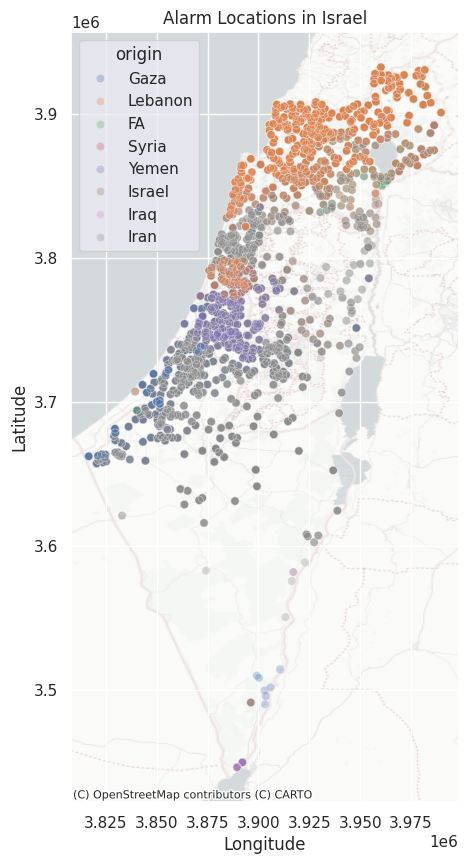

In [170]:
# Plot the data on the map

ax = sns.scatterplot(data=gdf_wm, x="X", y="Y",hue="origin", alpha=0.3)
sns.set_theme(rc={'figure.figsize':(5,10)}) # for some reason we sometimes need resizing and sometimes not
##ax = gdf_wm.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')
##gdf_wm.plot(ax=ax, markersize=10, color=gdf_wm.origin)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)

ax.set_title('Alarm Locations in Israel')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [171]:
plt.close()

### plotly

In [70]:
#  plot an animated scatter plot on a map with
# longitude as gdf_wm.geometry.x and latitude as gdf_wm.geometry.y
# the scatter plot is updated by time frames dictated by gdf_wm.time.
# zoom in to israel's map area
### Doesn't work KUSEMEK

"""
import plotly.express as px


fig = px.scatter_geo(gdf_wm,
                     lat=gdf_wm.geometry.y/100000-7,
                     lon=gdf_wm.geometry.x/100000-2,
                     animation_frame="time",
                     hover_name="cities",
                     color="origin",
                     title="Animated Alarm Locations in Israel")

fig.update_geos(
    visible=True,
    resolution=50,
    showcountries=True,
    countrycolor="Black",
    showcoastlines=True,
    coastlinecolor="RebeccaPurple",
    showland=True,
    landcolor="white",
    showocean=True,
    oceancolor="Azure",
    projection_type="natural earth",
    center=dict(lat=31.77, lon=35.21),  # Center on Israel
    #lataxis_range=[gdf_wm.geometry.y.min()/100000,gdf_wm.geometry.y.max()/100000],  # Adjust latitude range
    #lonaxis_range=[gdf_wm.geometry.x.min()/100000,gdf_wm.geometry.x.max()/100000]
    lataxis_range=[29, 33.5],  # Adjust latitude range
    lonaxis_range=[34, 36] # Adjust longitude range
    #projection_scale=5
)

fig.update_layout(
    height=800,
    width=600,
    margin={"r":0,"t":0,"l":0,"b":0})

fig.show()
"""

In [71]:
# doesn't really work either
"""
fig = px.scatter(
    gdf_wm,
    x='X',
    y='Y',
    animation_frame='time',
    color='origin'
)


#fig.update_layout(
#        showlegend = True,
#        geo = dict(
#            scope = 'asia',
#            resolution = 50,
#            lonaxis_range= [3.8,3.98 ],
#            lataxis_range= [3.4, 3.95],
#            landcolor = 'rgb(217, 217, 217)',
#        )
#    )

ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)

ax.set_title('Alarm Locations in Israel')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

fig.update_layout(
    height=(33.5-29)*200,
    width=(36-34)*200,
    margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

"""

<Figure size 1000x500 with 0 Axes>

In [72]:
#plt.close()

### funcanimation

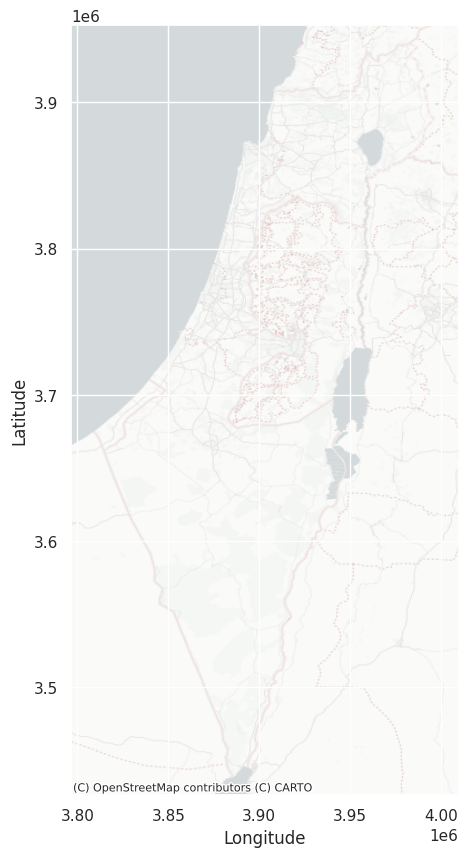

In [174]:
# Animated plot with funcanimation
fig, ax = plt.subplots()

# x and y axes limits:
MARGIN = 2e4
ax.set_xlim([gdf_wm.X.min()-MARGIN, gdf_wm.X.max()+MARGIN])
ax.set_ylim([gdf_wm.Y.min()-MARGIN, gdf_wm.Y.max()+MARGIN])

# Basemap of the world:
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)

# Set plot configurations:
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.gcf().set_size_inches(5, 10)


def animate(i):
    """
    Update the scatter plot for each frame of the animation.
    Args:
        i: The current frame number.
    Returns:
        A list of updated artists.
    """
    # Get current time dataframe
    current_time = gdf_wm['time'].unique()[i]
    df_frame = gdf_wm[gdf_wm['time'] == current_time]

    # To remove legend text to not get repeated legend labels:
    for artist in ax.lines + ax.texts:
      # ax.collections: scatter plot points # if you don't want accumulating scatter points
      # ax.lines: lines from the plot
      # ax.texts: text elements (like the title)
      artist.remove()

    # legend has to be either 'brief' or 'full'
    sns.scatterplot(data=df_frame, x="X", y="Y", hue=gdf_wm["origin"], alpha=0.5, ax=ax, legend="brief")
    ax.legend(bbox_to_anchor=(0, 1), loc='upper left')

    ax.set_title(f'Alarm Locations in Israel - {current_time}')

    return []


# Create the animation
ani = animation.FuncAnimation(
    fig, animate, frames=len(gdf_wm['time'].unique()), blit=False)

plt.show()



In [173]:
writervideo = animation.FFMpegWriter(fps=24)
ani.save('/content/animation.mp4', writer=writervideo)

In [76]:
plt.close()

### playground for animation plot

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



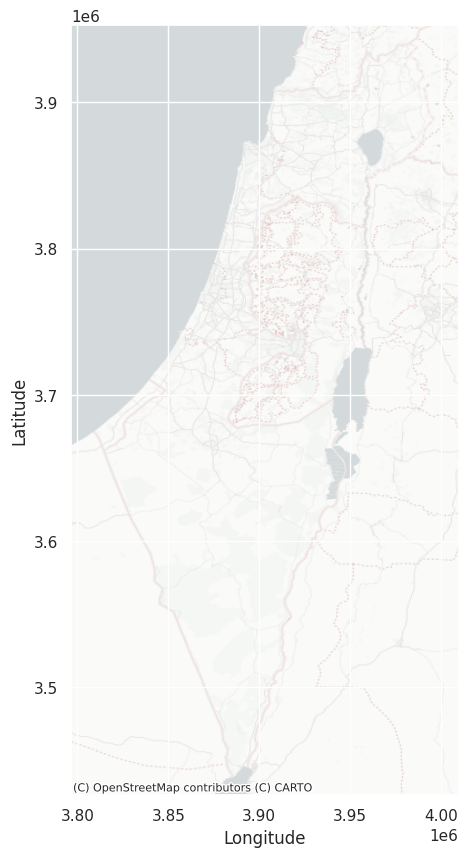

In [158]:
"""
# create the same plot as above but with filtered data above 01-09-2024

# ### getting only points since Oct 7th 2023
# filter merged_df since october 7th 2023

tmp = merged_df[merged_df['time'] >= '2024-09-01']
tmp
# leave only the day, month and year in time in merged_df_filtered
# TODO: create a col with just months and years
tmp.loc[:,'time'] = tmp['time'].dt.strftime('%Y-%m-%d')
tmp
# # Plotting map
# Create a GeoDataFrame from the alarm data
foo = gpd.GeoDataFrame(
    tmp, geometry=gpd.points_from_xy(tmp.Y, tmp.X))
foo.crs="EPSG:4326"
foo = foo.to_crs(epsg=4326)

# ### funcanimation
# Animated plot with funcanimation
fig, ax = plt.subplots()

# x and y axes limits:
MARGIN = 2e4 # don't know it MARGIN really works
ax.set_xlim([foo.X.min()-MARGIN, foo.X.max()+MARGIN])
ax.set_ylim([foo.Y.min()-MARGIN, foo.Y.max()+MARGIN])

# Basemap of the world:
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)
# Wanted to set the legend outside, didn't work
#ax.legend(handles=gdf_wm.origin.unique())
#plt.gca().legend(('y0','y1'))

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#plt.gcf().set_size_inches((foo.X.max()-foo.X.min())/100000*2.3,(foo.Y.max()-foo.Y.min())/100000*2.3)
plt.gcf().set_size_inches(5,10)

#plt.legend(labels=foo["origin"].dropna().unique().tolist(), bbox_to_anchor=(0, 1), loc='upper left')
# Wanted to set the legend outside, didn't work
#plt.legend(labels=gdf_wm["origin"].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')
#ax.legend(handles=gdf_wm.origin.unique())
#plt.gca().legend(('y0','y1'))
handles=[]

def animate(i):

    #Update the scatter plot for each frame of the animation.

    #Args:
    #    i: The current frame number.

    #Returns:
    #    A list of updated artists.


    current_time = foo['time'].unique()[i]
    df_frame = foo[foo['time'] == current_time]

    # Clear the existing scatter plot
    #ax.clear()
    #ax.legend_.remove() # doesn't work
    #ax.legend().remove() # doesn't work
    #plt.legend().remove() # gives warning for no artist handles
    #if ax.get_legend() is not None:
    #    ax.get_legend().remove()

    for artist in ax.lines + ax.texts:
        # ax.collections: scatter plot points
        # ax.lines: lines from the plot
        # ax.texts: text elements (like the title)
        artist.remove()


    g = sns.scatterplot(data=df_frame, x="X", y="Y", hue=foo["origin"], alpha=0.5, ax=ax, legend="brief")
    ax.legend(bbox_to_anchor=(0, 1), loc='upper left')

    #handles.append(g)
    #plt.legend(labels=gdf_wm["origin"].unique(), bbox_to_anchor=(1.05, 1), loc='upper left'
    #plot_labels=foo["origin"].dropna().unique().tolist()
    #if plot_labels:
    #  plt.legend(handles=ax.legend_.legendHandles, labels=plot_labels, bbox_to_anchor=(0, 1), loc='upper left')

    #plt.gca().legend(gdf_wm.origin.unique())
    # Set the x and y limits again to ensure they are fixed
    #ax.set_xlim([gdf_wm.X.min() - MARGIN, gdf_wm.X.max() + MARGIN])
    #ax.set_ylim([gdf_wm.Y.min() - MARGIN, gdf_wm.Y.max() + MARGIN])

    # Add the basemap again after clearing
    #ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)

    # Plot the data for the current frame

    ax.set_title(f'Alarm Locations in Israel - {current_time}')

    return []


# Create the animation
ani = animation.FuncAnimation(
    fig, animate, frames=len(foo['time'].unique()), blit=False
)



# Display the animation in Colab
plt.show()
"""

In [114]:
#foo["origin"].unique()

array(['Lebanon', 'Gaza', nan, 'Yemen', 'Iraq', 'FA', 'Iran'],
      dtype=object)

In [159]:
#writervideo = animation.FFMpegWriter(fps=24)
#ani.save('/content/animation.mp4', writer=writervideo)

In [157]:
#plt.close()